In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv("C:\\Users\\kalpana\\Downloads\\Fraud_check.csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
le = preprocessing.LabelEncoder()

In [6]:
df["Undergrad"]=le.fit_transform(df["Undergrad"])
df["Urban"]=le.fit_transform(df["Urban"])
df["Marital.Status"]=le.fit_transform(df["Marital.Status"])

In [7]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [8]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [9]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [14]:
df.drop(labels=['Taxable.Income'],axis=1,inplace=True)

In [15]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [16]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc_Good
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


In [17]:
import seaborn as sns

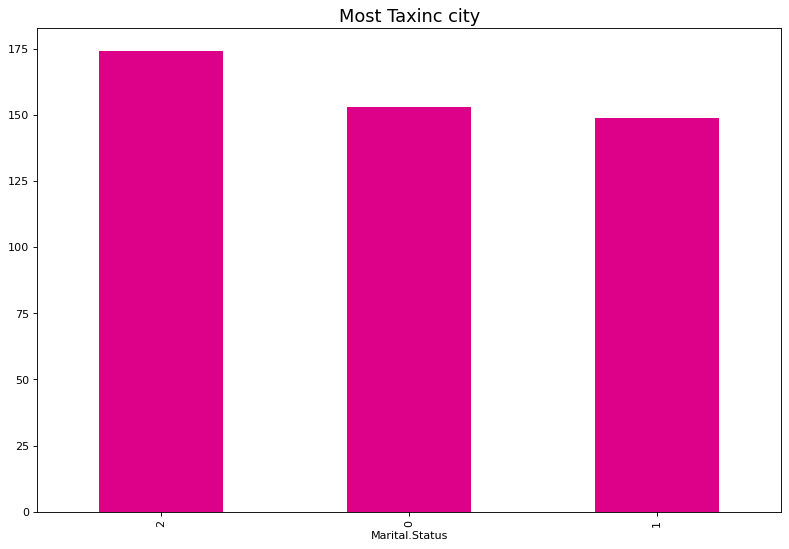

In [18]:
po=df.groupby("Marital.Status")["TaxInc_Good"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
po.plot.bar(color="#dd0088")
plt.title("Most Taxinc city",fontsize=16)
plt.show()

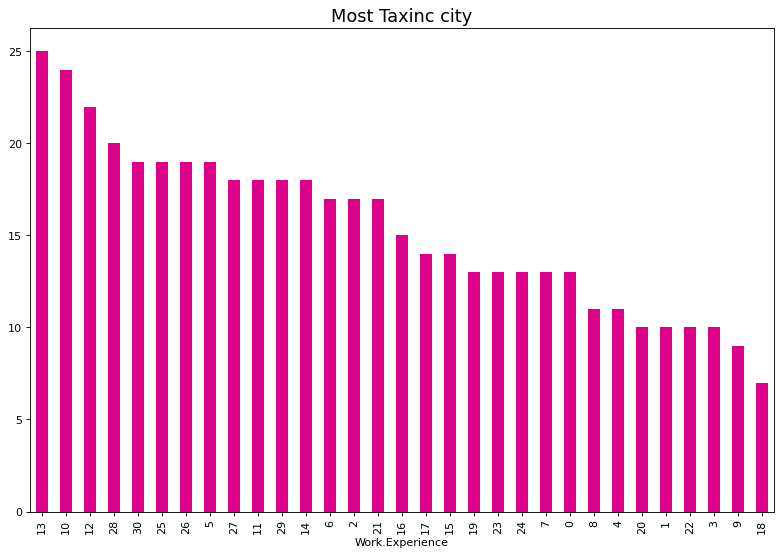

In [21]:
po=df.groupby("Work.Experience")["TaxInc_Good"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
po.plot.bar(color="#dd0088")
plt.title("Most Taxinc city",fontsize=16)
plt.show()

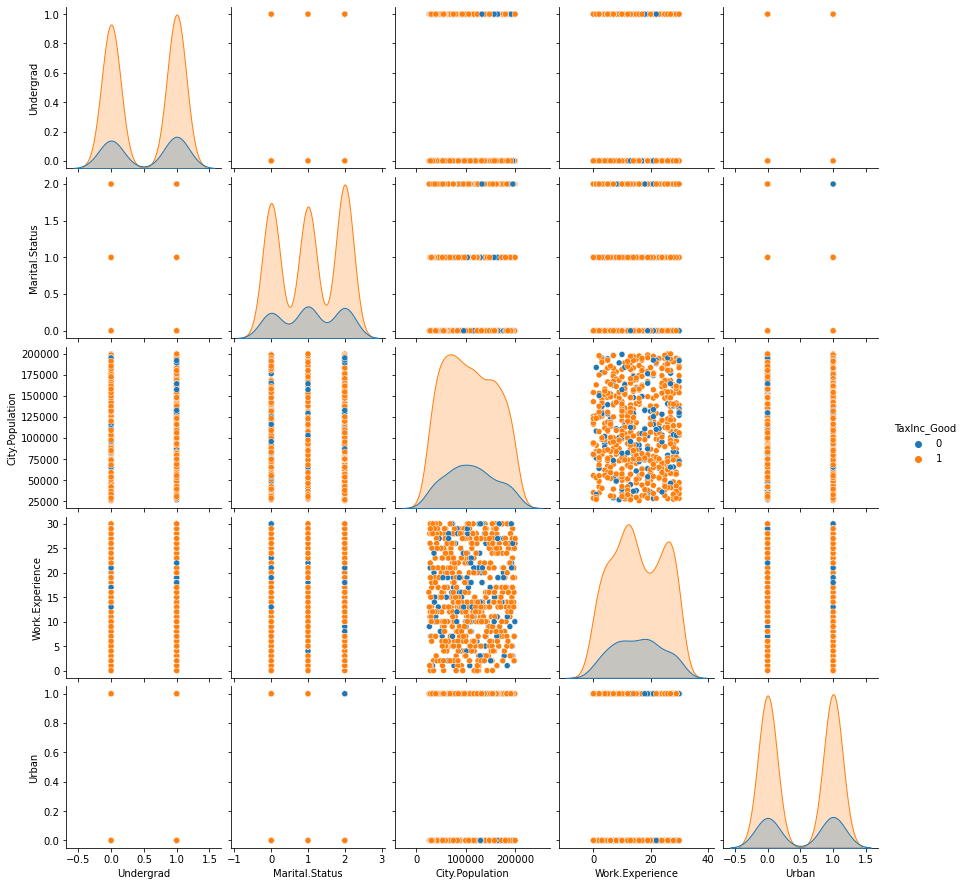

In [22]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue ="TaxInc_Good")

<AxesSubplot:>

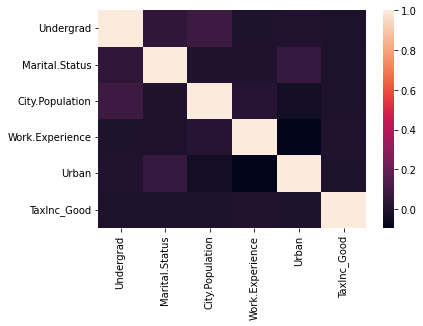

In [23]:
# correlation matrix
sns.heatmap(df.corr())

In [25]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [26]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,Marital.Status,City.Population,Work.Experience,Urban,TaxInc_Good
590,0.5,0.341473,0.466667,1.0,1.0
591,1.0,0.615406,0.600000,1.0,0.0
592,1.0,0.283703,0.533333,0.0,1.0
593,0.0,0.610256,0.333333,1.0,1.0
594,0.5,0.412341,0.300000,1.0,1.0
595,0.0,0.078811,0.233333,1.0,1.0
596,0.0,0.170058,0.066667,1.0,1.0
597,0.0,0.737240,0.000000,1.0,1.0
598,0.5,0.886810,0.566667,0.0,1.0
599,0.0,0.760683,0.533333,0.0,1.0


In [27]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

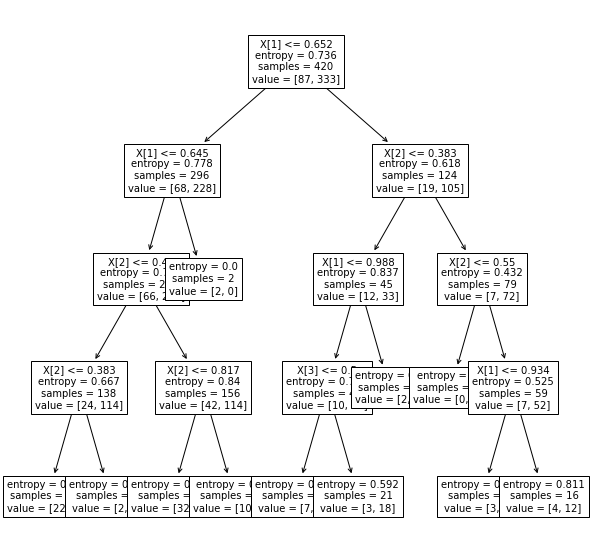

In [28]:
# Create train and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
#
# Train the model using DecisionTree classifier
#
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)
#
# Plot the decision tree
#
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

In [29]:
# Predicting the values of test data
y_pred =clf_tree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix 

In [31]:
#Building Decision Tree Classifier using Entropy Criteria

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [32]:
y_pred1 = model.predict(X_test)

In [33]:
#Find the accuracy
model.score(X_test,y_test)

0.7944444444444444

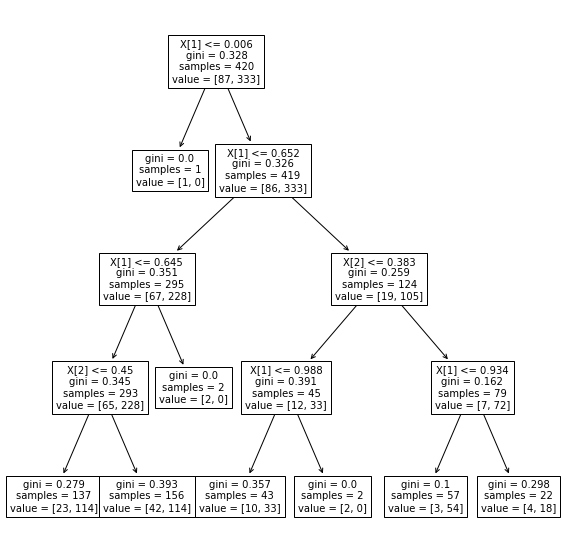

In [34]:
# Create train and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
#
# Train the model using DecisionTree classifier
#
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)
#
# Plot the decision tree
#
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

In [35]:
#Building Decision Tree Classifier (CART) using Gini Criteria
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=1)

In [36]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [37]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(pred==y_test)

0.7944444444444444

Text(0.5, 1.0, 'Accuracy Score: 0.7833333333333333')

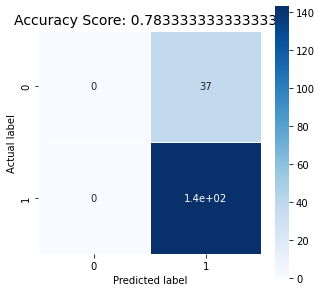

In [38]:
cm = confusion_matrix(y_test, y_pred1 )
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf_tree.score(X_test, y_test))
plt.title(all_sample_title, size = 14)

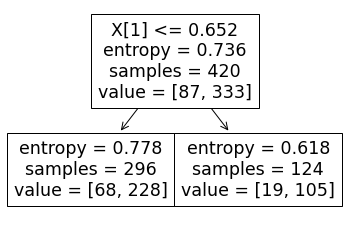

In [39]:
#PLot the decision tree
tree.plot_tree(model);

# Decision Tree Regression Example

In [40]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [41]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)
DecisionTreeRegressor()

DecisionTreeRegressor()

In [42]:
#Find the accuracy
model1.score(X_test,y_test)

-1.1772821772821773

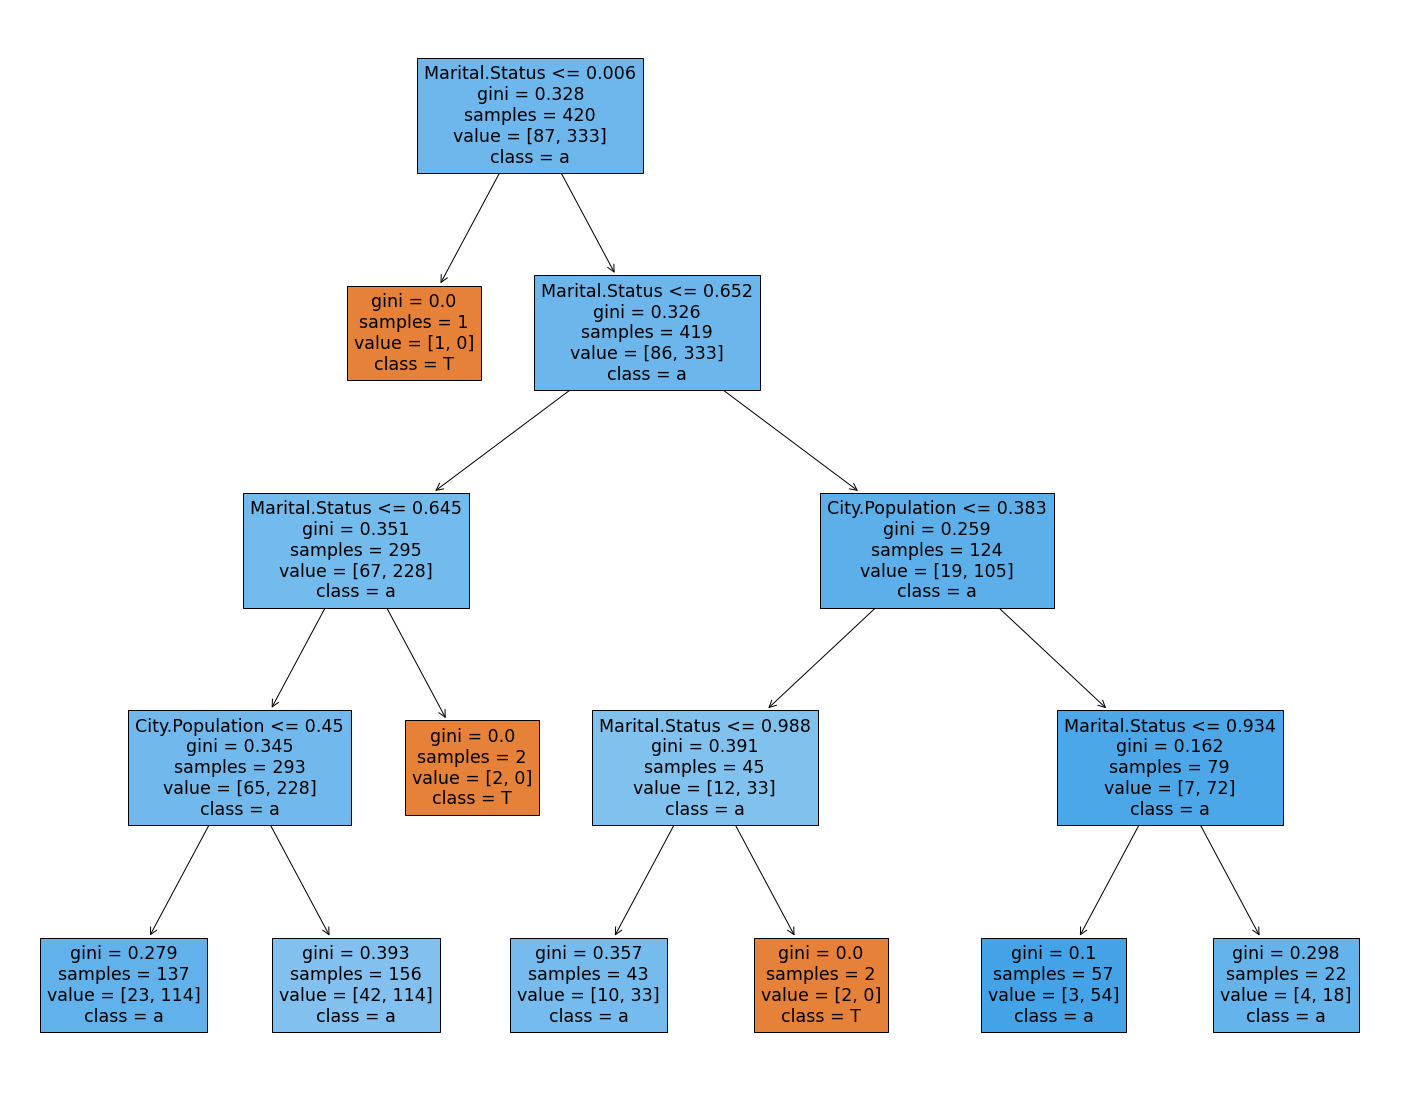

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_tree, 
                   feature_names=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'],  
                   class_names='Taxable.Income',
                   filled=True)

In [44]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred })

In [45]:
df_t

,Actual,Predicted
68,0.0,1.0
61,0.0,1.0
326,0.0,1.0
488,1.0,1.0
75,1.0,1.0
...,...,...
299,1.0,1.0
362,0.0,1.0
31,1.0,1.0
204,0.0,1.0


#  RandomForest Regressor

In [46]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [48]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.33249999999999996
Mean Squared Error: 0.20423611111111112
Root Mean Squared Error: 0.451924895431875


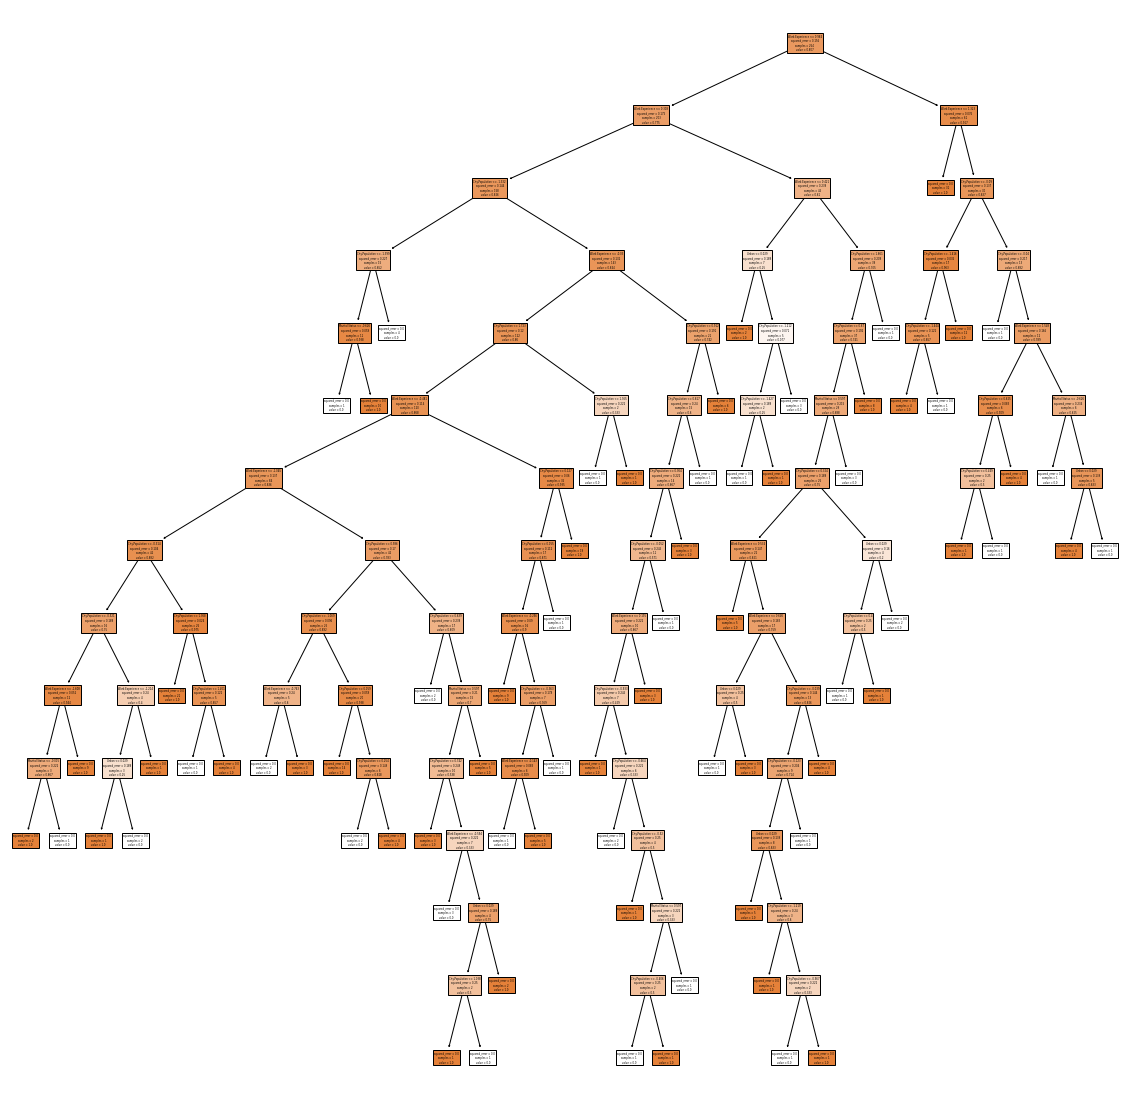

In [49]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(regressor.estimators_[0], feature_names=X.columns, filled=True)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

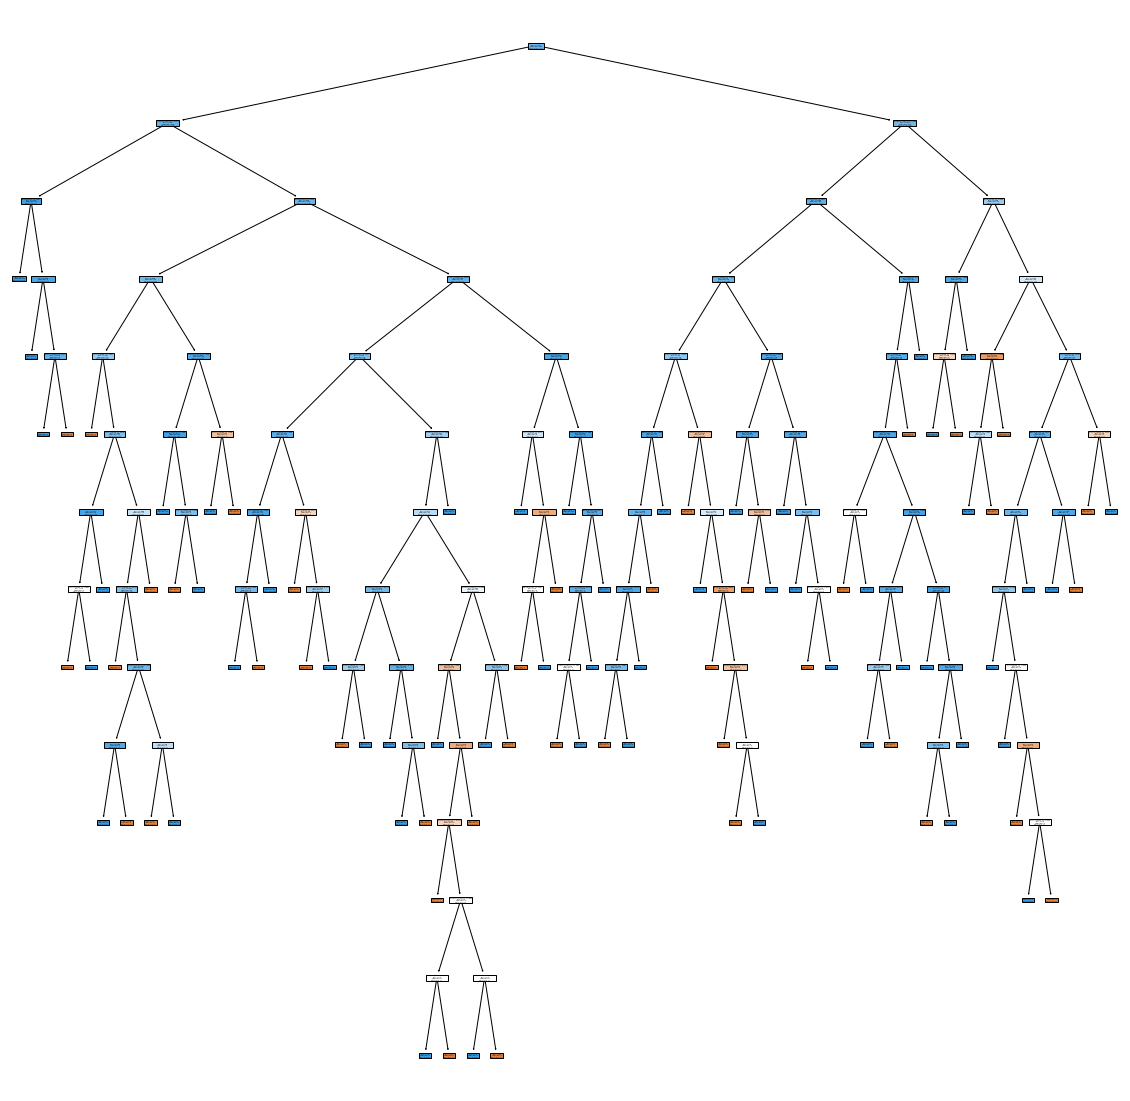

In [52]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

# Bagged Decision Trees for Classification

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [54]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=1)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7383333333333333


In [55]:
model.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [56]:
pred1 = model.predict(X_test)

In [57]:
pred1

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [66]:
df_t2=pd.DataFrame({'Actual':y_test, 'Predicted':pred1 })

In [68]:
df_t2

,Actual,Predicted
68,0.0,1.0
61,0.0,1.0
326,0.0,1.0
488,1.0,1.0
75,1.0,1.0
...,...,...
299,1.0,0.0
362,0.0,1.0
31,1.0,1.0
204,0.0,1.0


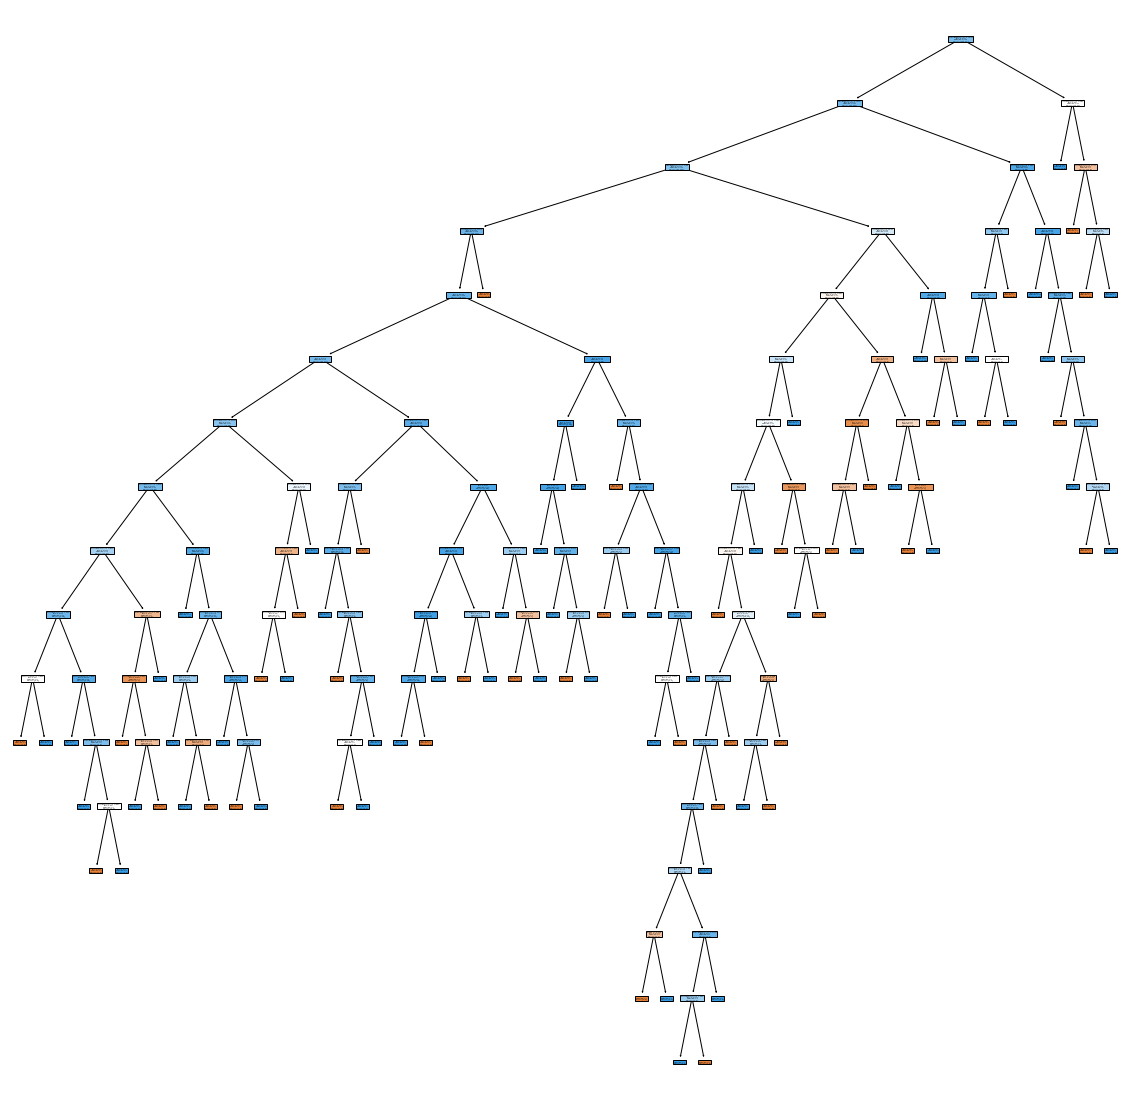

In [69]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)

# AdaBoost Classification

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model1 = AdaBoostClassifier(base_estimator=cart, n_estimators=num_trees, random_state=1)
results = cross_val_score(model1, X, y, cv=kfold)
print(results.mean())

0.6266666666666667


In [72]:
model1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=1)

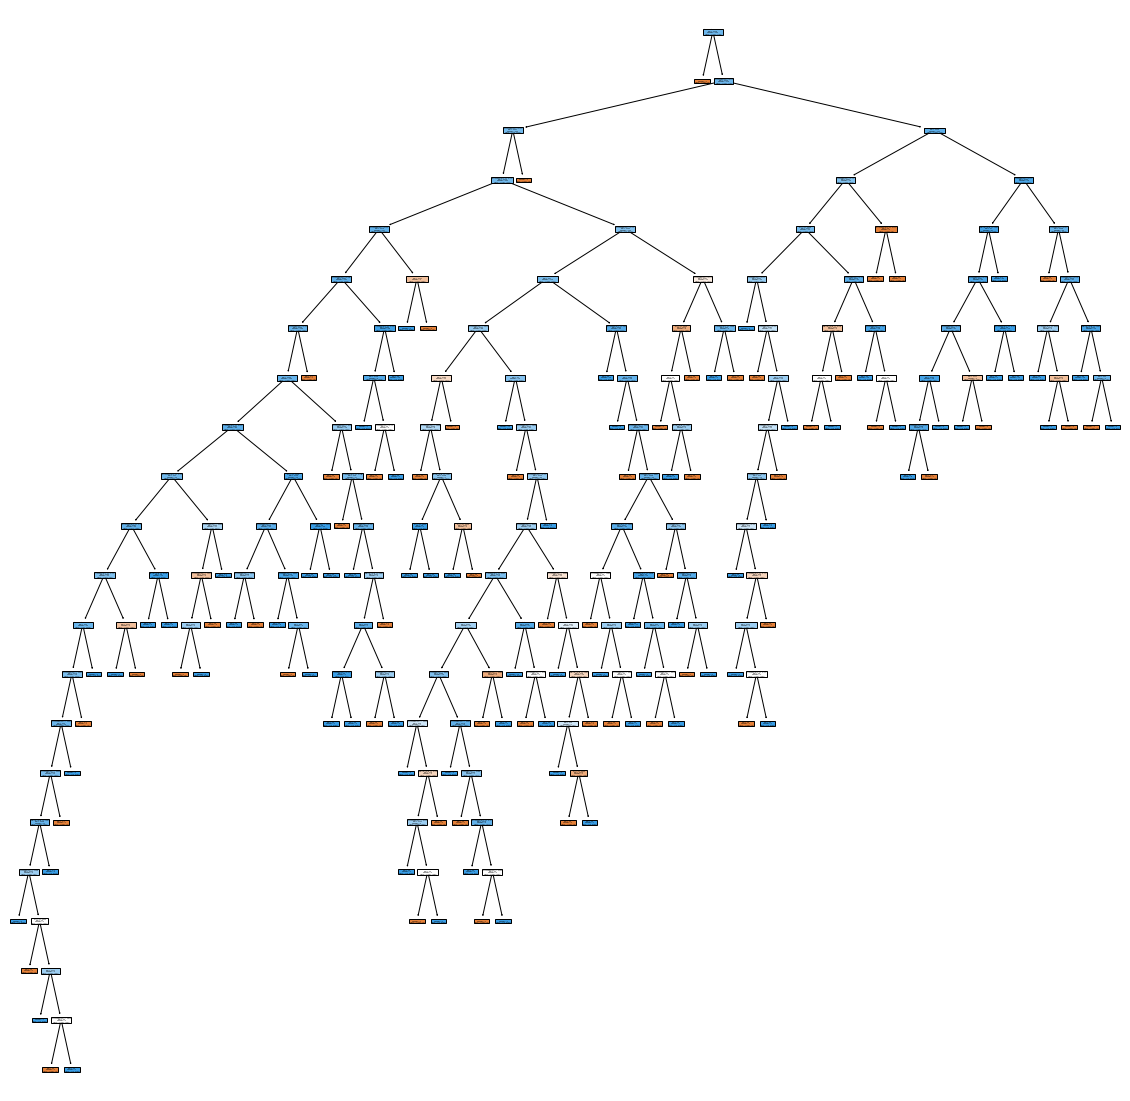

In [73]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model1.estimators_[0], feature_names=X.columns, filled=True)

# # ensemble model 1

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [75]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
model4 = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.7933333333333332


(-1.1021369633920977,
 1.1001017601615284,
 -1.1030715721302304,
 1.1012747194665584)

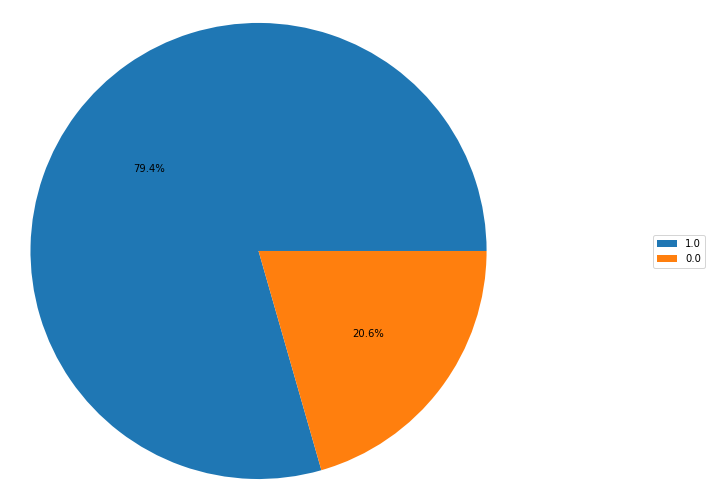

In [78]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df_t2["Actual"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

(-1.1076175380380189,
 1.1003627399065723,
 -1.1031339018938915,
 1.107857426779298)

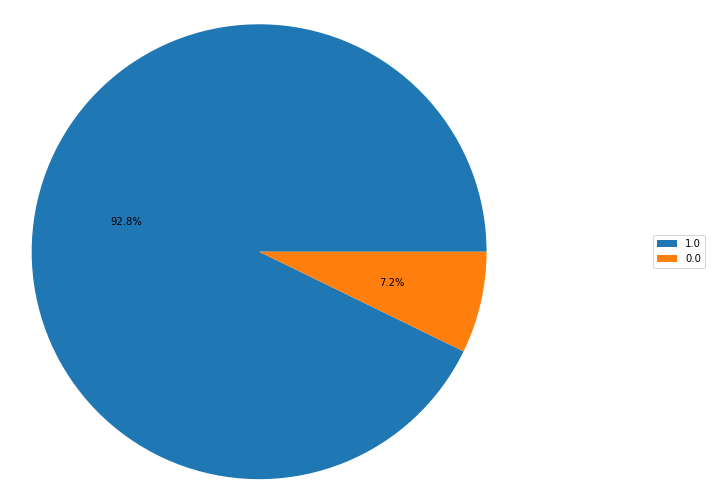

In [79]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df_t2["Predicted"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")